### Fandago Rating Investigation 

&nbsp;&nbsp;&nbsp;&nbsp;There was a research conducted found that Fandago ratings was inflating the actual value of the rating to make the rating of the movie somehow high or looks good. Fandago rating stated that it was not intentional, this is caused by a a bug and they will try to fix it.In This research, the researchers will focus on whether fandago ratings have fixed the rating system that they claimed caused by a bug in their system.

For the data that we will use, we will use: 
1. Past data - the previous research from Walt Hickey that is publicly avalable on Github about Fandago's rating system
2. Current data - the movie rating realeased in 2016 and 2017 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is 6C2B-73AD

 Directory of C:\Users\asus\Desktop\Project for data science Dataquest\Investigating fandago rating

03/18/2021  06:46 AM    <DIR>          .
03/18/2021  06:46 AM    <DIR>          ..
03/18/2021  05:32 AM    <DIR>          .ipynb_checkpoints
03/18/2021  06:46 AM            18,017 Fandago Investigation.ipynb
01/01/1970  07:00 AM            15,144 fandango_score_comparison.csv
03/18/2021  05:31 AM            34,816 Guided Project Investigating Fandango Movie Ratings.tar
01/01/1970  07:00 AM            14,300 movie_ratings_16_17.csv
               4 File(s)         82,277 bytes
               3 Dir(s)  31,453,351,936 bytes free


In [3]:
#Reading the data 
PR = pd.read_csv("fandango_score_comparison.csv")
CR = pd.read_csv("movie_ratings_16_17.csv") 

In [4]:
#Exploring the data
PR.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [5]:
CR.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [11]:
PR_S = PR[["FILM","Fandango_Stars","Fandango_Ratingvalue","Fandango_votes","Fandango_Difference"]].copy()
CR_S = CR[["movie","year","fandango"]].copy()

After reading the data more thoroughly, it can be seen that the movie is not sampled randomly. The data is not sucifient to answer the goal which is there is difference from the old system and the new system that they said they fixed it. Therefore, the researchers will change the goal as proxy of the current goal which are the difference in fandago rating for popular movie in 2015 and 2016. 

In [22]:
#Dropping the year aside from 2015 in previous research
PR_S["Year"] = PR_S["FILM"].str.extract("\((\d+)\)").copy()

In [23]:
PR_S.drop(PR_S[PR_S["Year"] == "2014"].index, inplace = True)

In [31]:
#Dropping the year aside from 2016 in post research 
CR_S.drop(CR_S[CR_S["year"] == 2017].index, inplace = True)

In [32]:
CR_S.year.value_counts()

2016    191
Name: year, dtype: int64

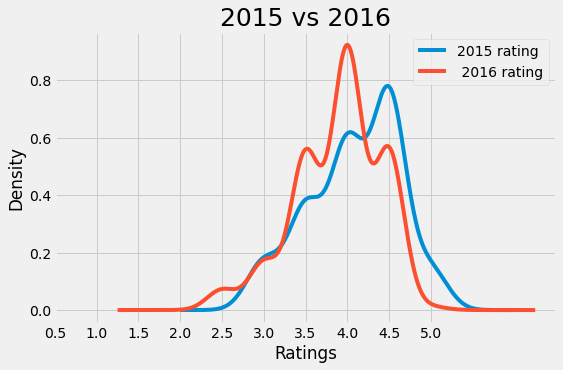

In [119]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (8,5))
PR_S["Fandango_Stars"].plot.kde(label = "2015 rating")
CR_S["fandango"].plot.kde(label =" 2016 rating")
plt.title("2015 vs 2016", fontdict = {"fontsize":"25"})
plt.ylabel("Density")
plt.xlabel("Ratings")
plt.xticks([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.legend()

From the data it can be seen that the rating for fandago in 2016 is still negatively skewed but still there are ratings lower than 3 and the rating seems more appropriate compares to 2015 rating. This is explained by 2016's movies rated lower compare to 2015

In [120]:
#Comparing the data
pd.DataFrame({"PR_S": [PR_S["Fandango_Stars"].value_counts().sum()], "CR_S" : [CR_S["fandango"].value_counts().sum()]})

,PR_S,CR_S
0,129,191


from the data it can be found that it has different value, therefore, its better for the researchers to use normalize format instead of absolute frequency because of the differences in value 

In [125]:
#Now the researchers will compare the data using the statistic method
comp = pd.DataFrame({"stats" : ["Mean","Median","Mode"],
                     "2015" : [round(PR_S["Fandango_Stars"].mean(),2), PR_S["Fandango_Stars"].median(), PR_S["Fandango_Stars"].mode()[0]], 
                     "2016" : [round(CR_S["fandango"].mean(),2), CR_S["fandango"].median(), CR_S["fandango"].mode()[0]]})

In [126]:
comp

,stats,2015,2016
0,Mean,4.09,3.89
1,Median,4.00,4.00
2,Mode,4.50,4.00


In [127]:
comp.set_index("stats",inplace = True)

<Figure size 1440x1440 with 0 Axes>

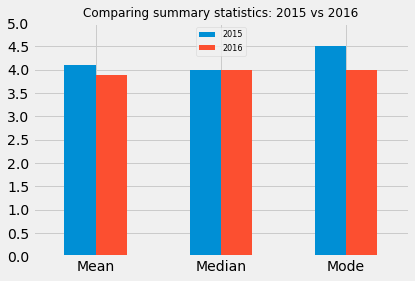

In [128]:
plt.figure(figsize = (20,20))
comp.plot.bar()
plt.title("Comparing summary statistics: 2015 vs 2016", fontdict = {"fontsize" : "12"})
plt.xticks(rotation = 0)
plt.xlabel("")
plt.yticks([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.legend(loc = "upper center", fontsize = "xx-small")

It is found that the mean in 2016 surely slightly lower compare to 2015, therefore it can be said that the change in rating system of fandago for popular film has been fixed.